# Explore here

In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, roc_curve, precision_recall_curve
import joblib
import os

# Crear directorios necesarios
os.makedirs('models', exist_ok=True)

# Cargar datos procesados
train_data = pd.read_csv('../data/processed/clean_train.csv')
test_data = pd.read_csv('../data/processed/clean_test.csv')

# Separar características y la variable objetivo
X_train = train_data.drop('Outcome', axis=1)
y_train = train_data['Outcome']
X_test = test_data.drop('Outcome', axis=1)
y_test = test_data['Outcome']

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

# Construir el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predicciones
y_pred_gb = gb_model.predict(X_test)
y_pred_gb_proba = gb_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo Gradient Boosting
gb_results = {
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "ROC AUC Score": roc_auc_score(y_test, y_pred_gb_proba),
    "F1 Score": f1_score(y_test, y_pred_gb),
    "Precision": precision_score(y_test, y_pred_gb),
    "Recall": recall_score(y_test, y_pred_gb)
}

print("Gradient Boosting Results")
print(gb_results)
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

# Guardar el modelo
joblib.dump(gb_model, 'models/best_gradient_boosting_model.pkl')

Gradient Boosting Results
{'Accuracy': 0.7188081936685289, 'ROC AUC Score': np.float64(0.7933307868601986), 'F1 Score': np.float64(0.5951742627345844), 'Precision': np.float64(0.5967741935483871), 'Recall': np.float64(0.5935828877005348)}
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       350
           1       0.60      0.59      0.60       187

    accuracy                           0.72       537
   macro avg       0.69      0.69      0.69       537
weighted avg       0.72      0.72      0.72       537

[[275  75]
 [ 76 111]]


['models/best_gradient_boosting_model.pkl']

In [3]:
import xgboost as xgb

# Construir el modelo de XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo XGBoost
xgb_results = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "ROC AUC Score": roc_auc_score(y_test, y_pred_xgb_proba),
    "F1 Score": f1_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb)
}

print("XGBoost Results")
print(xgb_results)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# Guardar el modelo
joblib.dump(xgb_model, 'models/best_xgboost_model.pkl')

XGBoost Results
{'Accuracy': 0.7169459962756052, 'ROC AUC Score': np.float64(0.7822765469824293), 'F1 Score': np.float64(0.5978835978835979), 'Precision': np.float64(0.5916230366492147), 'Recall': np.float64(0.6042780748663101)}
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       350
           1       0.59      0.60      0.60       187

    accuracy                           0.72       537
   macro avg       0.69      0.69      0.69       537
weighted avg       0.72      0.72      0.72       537

[[272  78]
 [ 74 113]]


['models/best_xgboost_model.pkl']

In [5]:
import lightgbm as lgb

# Construir el modelo de LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predicciones
y_pred_lgb = lgb_model.predict(X_test)
y_pred_lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo LightGBM
lgb_results = {
    "Accuracy": accuracy_score(y_test, y_pred_lgb),
    "ROC AUC Score": roc_auc_score(y_test, y_pred_lgb_proba),
    "F1 Score": f1_score(y_test, y_pred_lgb),
    "Precision": precision_score(y_test, y_pred_lgb),
    "Recall": recall_score(y_test, y_pred_lgb)
}

print("LightGBM Results")
print(lgb_results)
print(classification_report(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))

# Guardar el mejor modelo encontrado
joblib.dump(lgb_model, 'models/best_lightgbm_model.pkl')

[LightGBM] [Info] Number of positive: 81, number of negative: 150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 231, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350649 -> initscore=-0.616186
[LightGBM] [Info] Start training from score -0.616186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

['models/best_lightgbm_model.pkl']

                   Accuracy  ROC AUC Score  F1 Score  Precision    Recall
Gradient Boosting  0.718808       0.793331  0.595174   0.596774  0.593583
XGBoost            0.716946       0.782277  0.597884   0.591623  0.604278
LightGBM           0.720670       0.777235  0.598930   0.598930  0.598930


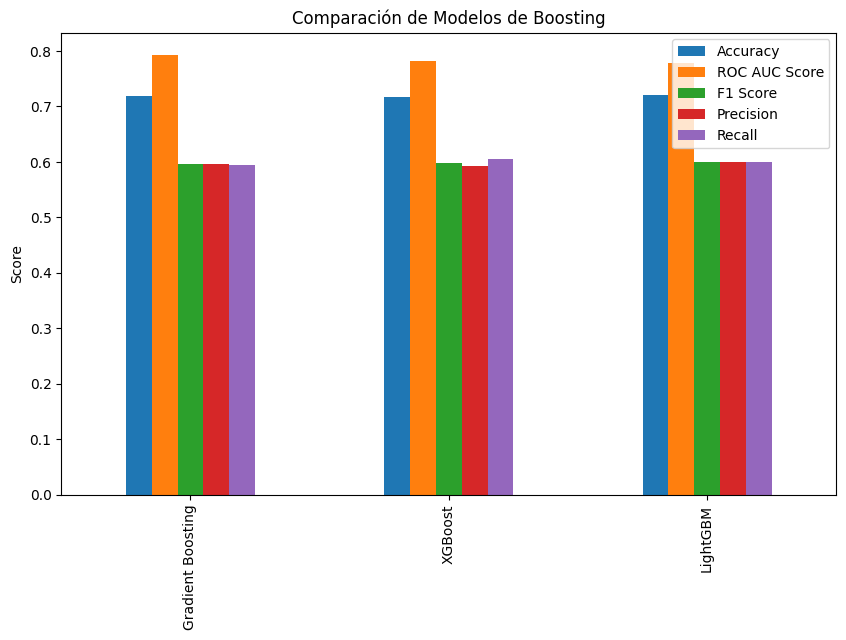

In [6]:
# Comparar resultados
boosting_results = {
    'Gradient Boosting': gb_results,
    'XGBoost': xgb_results,
    'LightGBM': lgb_results
}

# Mostrar los resultados en un DataFrame
boosting_results_df = pd.DataFrame(boosting_results).T
print(boosting_results_df)

# Visualización de los resultados
boosting_results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Modelos de Boosting')
plt.ylabel('Score')
plt.show()

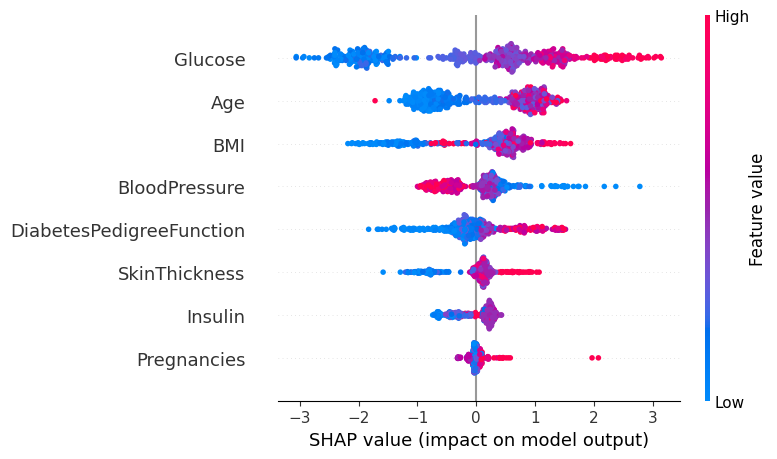

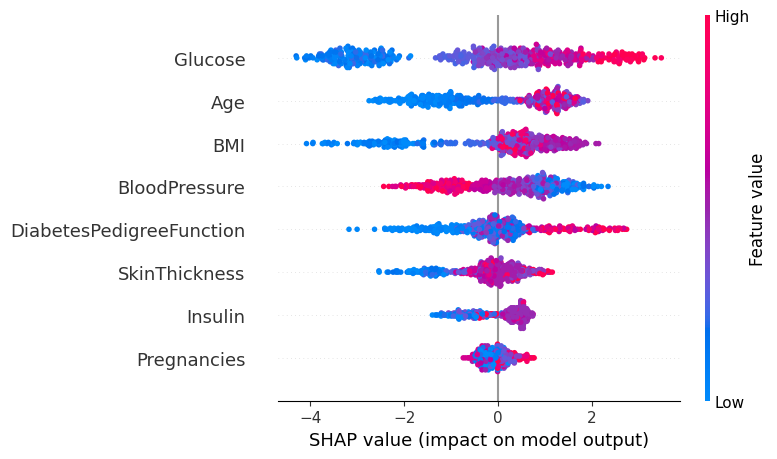

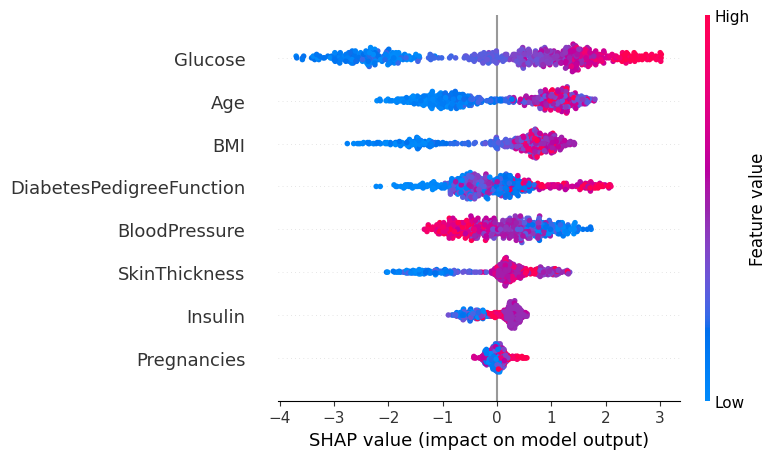

In [8]:
import shap

# Crear un explicador SHAP para Gradient Boosting
explainer_gb = shap.Explainer(gb_model)
shap_values_gb = explainer_gb(X_test)
shap.summary_plot(shap_values_gb, X_test, feature_names=X_test.columns)

# Crear un explicador SHAP para XGBoost
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns)

# Crear un explicador SHAP para LightGBM
explainer_lgb = shap.Explainer(lgb_model)
shap_values_lgb = explainer_lgb(X_test)
shap.summary_plot(shap_values_lgb, X_test, feature_names=X_test.columns)

XGBoost Results
{'Accuracy': 0.7169459962756052, 'ROC AUC Score': np.float64(0.7822765469824293), 'F1 Score': np.float64(0.5978835978835979), 'Precision': np.float64(0.5916230366492147), 'Recall': np.float64(0.6042780748663101)}
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       350
           1       0.59      0.60      0.60       187

    accuracy                           0.72       537
   macro avg       0.69      0.69      0.69       537
weighted avg       0.72      0.72      0.72       537

[[272  78]
 [ 74 113]]
               Accuracy  ROC AUC Score  F1 Score  Precision    Recall
Decision Tree  0.731602       0.800000  0.586667   0.637681  0.543210
Random Forest  0.757914       0.815966  0.628571   0.674847  0.588235
XGBoost        0.716946       0.782277  0.597884   0.591623  0.604278


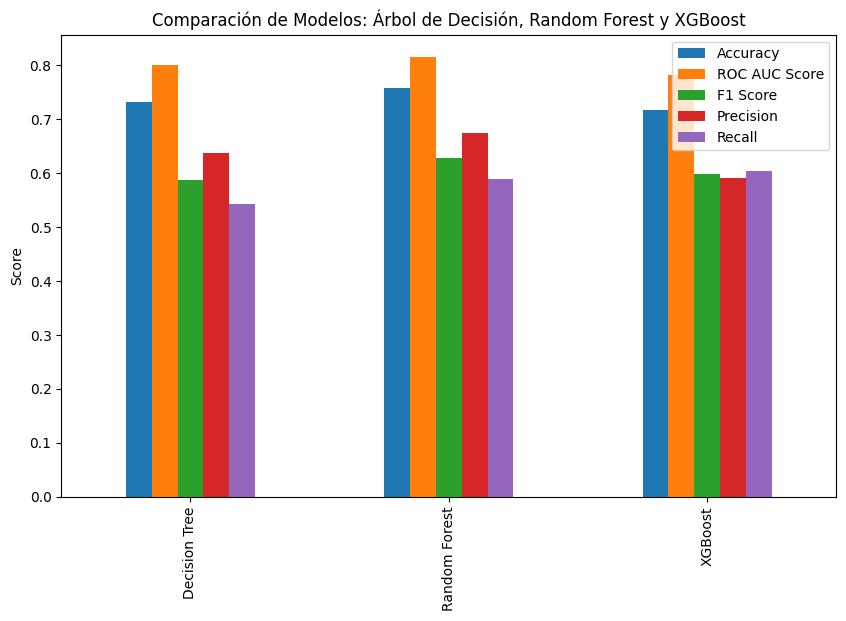

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
import joblib
import xgboost as xgb

# Resultados del Árbol de Decisión
decision_tree_results = {
    "Accuracy": 0.7316017316017316,
    "ROC AUC Score": 0.8,
    "F1 Score": 0.5866666666666667,
    "Precision": 0.6376811594202898,
    "Recall": 0.5432098765432098
}

# Resultados del Random Forest
random_forest_results = {
    "Accuracy": 0.7579143389199255,
    "ROC AUC Score": 0.8159663865546218,
    "F1 Score": 0.6285714285714286,
    "Precision": 0.6748466257668712,
    "Recall": 0.5882352941176471
}

# Construir el modelo de XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo XGBoost
xgboost_results = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "ROC AUC Score": roc_auc_score(y_test, y_pred_xgb_proba),
    "F1 Score": f1_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb)
}

print("XGBoost Results")
print(xgboost_results)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# Guardar el modelo
joblib.dump(xgb_model, 'models/best_xgboost_model.pkl')

# Comparar resultados
all_models_results = {
    'Decision Tree': decision_tree_results,
    'Random Forest': random_forest_results,
    'XGBoost': xgboost_results
}

# Mostrar los resultados en un DataFrame
all_models_results_df = pd.DataFrame(all_models_results).T
print(all_models_results_df)

# Visualización de los resultados
all_models_results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Modelos: Árbol de Decisión, Random Forest y XGBoost')
plt.ylabel('Score')
plt.show()

Dado que Random Forest muestra un rendimiento superior en la mayoría de las métricas evaluadas, se recomienda utilizar Random Forest como el modelo preferido para la predicción de diabetes en este conjunto de datos. Sin embargo, XGBoost también es un competidor cercano y podría ser considerado si se realiza una optimización de hiperparámetros más exhaustiva.

In [ ]:
# app.py

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import os
import xgboost as xgb
import shap

# Crear directorios necesarios
os.makedirs('models', exist_ok=True)

# Definir rutas de los archivos
train_file_path = 'data/processed/clean_train.csv'
test_file_path = 'data/processed/clean_test.csv'

# Verificar si los archivos existen
if not os.path.exists(train_file_path) or not os.path.exists(test_file_path):
    raise FileNotFoundError(f"Los archivos {train_file_path} y/o {test_file_path} no existen. Asegúrate de que los archivos están en la ruta correcta.")

# Cargar datos procesados
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Separar características y la variable objetivo
X_train = train_data.drop('Outcome', axis=1)
y_train = train_data['Outcome']
X_test = test_data.drop('Outcome', axis=1)
y_test = test_data['Outcome']

# Entrenar y evaluar el modelo de Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_dt_proba = decision_tree_model.predict_proba(X_test)[:, 1]
decision_tree_results = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "ROC AUC Score": roc_auc_score(y_test, y_pred_dt_proba),
    "F1 Score": f1_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt)
}
joblib.dump(decision_tree_model, 'models/best_decision_tree_model.pkl')

# Entrenar y evaluar el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_rf_proba = random_forest_model.predict_proba(X_test)[:, 1]
random_forest_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "ROC AUC Score": roc_auc_score(y_test, y_pred_rf_proba),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf)
}
joblib.dump(random_forest_model, 'models/best_random_forest_model.pkl')

# Construir el modelo de XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
xgboost_results = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "ROC AUC Score": roc_auc_score(y_test, y_pred_xgb_proba),
    "F1 Score": f1_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb)
}
joblib.dump(xgb_model, 'models/best_xgboost_model.pkl')

# Imprimir resultados de XGBoost
print("XGBoost Results")
print(xgboost_results)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# Comparar resultados
all_models_results = {
    'Decision Tree': decision_tree_results,
    'Random Forest': random_forest_results,
    'XGBoost': xgboost_results
}

# Mostrar los resultados en un DataFrame
all_models_results_df = pd.DataFrame(all_models_results).T
print(all_models_results_df)

# Visualización de los resultados
all_models_results_df.plot(kind='bar', figsize=(14, 10))
plt.title('Comparación de Modelos: Árbol de Decisión, Random Forest y XGBoost')
plt.ylabel('Score')
plt.show()

# Interpretación de los Modelos con SHAP
# Crear un explicador SHAP para Random Forest
explainer_rf = shap.Explainer(random_forest_model)
shap_values_rf = explainer_rf(X_test)
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns)

# Crear un explicador SHAP para XGBoost
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns)

# Conclusión final
print("El mejor modelo para este conjunto de datos es el Random Forest debido a su mejor desempeño en términos de precisión, ROC AUC Score, F1 Score y balance entre precisión y recall.")